# Feature Selection

## method 1

['carat', 'x', 'y', 'z']


<Axes: >

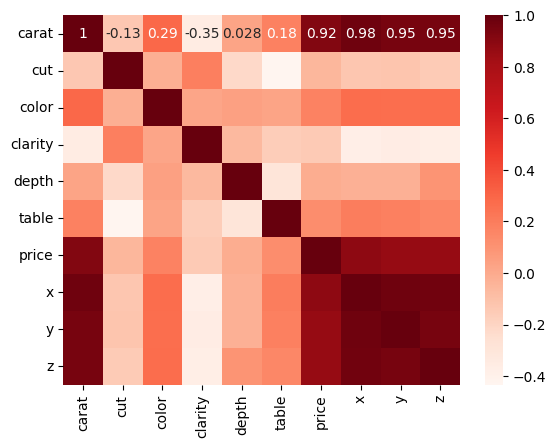

In [14]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'iris.csv' with the actual dataset file)
data = pd.read_csv ('diamonds.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data['color']= data['color'].map({'D':0, 'E':1, 'F':2, 'G':3, 'H':4, 'I':5, 'J':6})
data['cut']= data['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
data['clarity']= data['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

# Extract features and target
features = data.drop('price', axis=1)
target = data['price']



# Calculate Pearson correlation between features and the target variable
correlations = []
for column in features.columns:
    correlation, _ = pearsonr(features[column], target)
    correlations.append((column, abs(correlation)))

correlations.sort(key=lambda x: x[1], reverse=True)
selected_features = [feature for feature, correlation in correlations if correlation > 0.5]

print(selected_features)

sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Reds)



## method 2

In [15]:
correlation1 = data.corr(method='pearson').abs()['price']
selected_features1 = correlation1[correlation1 > 0.5]
selected_features1 = selected_features1.drop('price')
print(selected_features1)

carat    0.921591
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64


## wrapper method

### RFE (Recrusive Feature elimination)

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
 

ds = pd.read_csv ('diamonds.csv')
ds.drop('Unnamed: 0', axis=1, inplace=True)
ds['color']= ds['color'].map({'D':0, 'E':1, 'F':2, 'G':3, 'H':4, 'I':5, 'J':6})
ds['cut']= ds['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
ds['clarity']= ds['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

features = ds.drop('price', axis=1) 
target = ds['price']

model = LinearRegression()
selecter = RFE(model, n_features_to_select=5, step=1)   
selecter.fit(features, target)

selected_features2 = features.columns[selecter.get_support()]

print(selected_features2)

Index(['carat', 'cut', 'color', 'clarity', 'x'], dtype='object')


### SFS (Squential Feature Selection)

In [17]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
 

ds = pd.read_csv ('diamonds.csv')
ds.drop('Unnamed: 0', axis=1, inplace=True)
ds['color']= ds['color'].map({'D':0, 'E':1, 'F':2, 'G':3, 'H':4, 'I':5, 'J':6})
ds['cut']= ds['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
ds['clarity']= ds['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

features = ds.drop('price', axis=1) 
target = ds['price']

model = LinearRegression()
selecter = SequentialFeatureSelector(model,n_features_to_select=3, scoring='r2' )   
selecter.fit(features, target)

selected_features3 = features.columns[selecter.get_support()]

print(selected_features3)

Index(['carat', 'depth', 'x'], dtype='object')


# embedded methods

### lasso method

In [18]:
from sklearn.linear_model import Lasso

ds = pd.read_csv ('diamonds.csv')
ds.drop('Unnamed: 0', axis=1, inplace=True)
ds['color']= ds['color'].map({'D':0, 'E':1, 'F':2, 'G':3, 'H':4, 'I':5, 'J':6})
ds['cut']= ds['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
ds['clarity']= ds['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

features = ds.drop('price', axis=1) 
target = ds['price']

model = Lasso(alpha=0.1).fit(features, target)

selected_features4 = features.columns[model.coef_ != 0]

print(selected_features4)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')


# dimensionality reduction

### PCA

carat


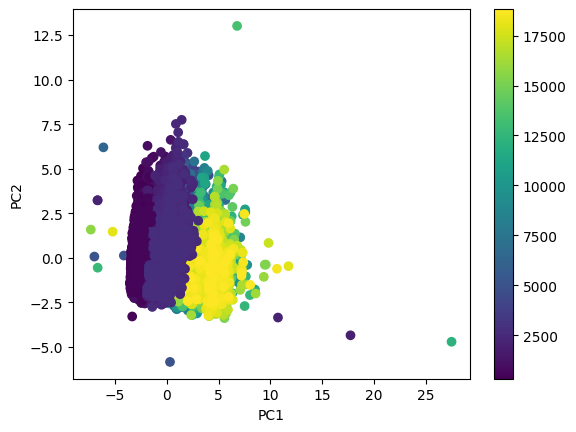

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


ds = pd.read_csv ('diamonds.csv')
ds.drop('Unnamed: 0', axis=1, inplace=True)
ds['color']= ds['color'].map({'D':0, 'E':1, 'F':2, 'G':3, 'H':4, 'I':5, 'J':6})
ds['cut']= ds['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
ds['clarity']= ds['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

features = ds.drop('price', axis=1)
target = ds['price']


features1 = StandardScaler().fit_transform(features)

pca = PCA(n_components=7).fit_transform(features1)

selected_features5 = features.columns[np.argmax(pca.var(axis=0))]

print(selected_features5)


# plotting pca


components = PCA().fit_transform(features1)
plt.scatter(components[:, 0], components[:, 1], c=target, cmap='viridis')
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


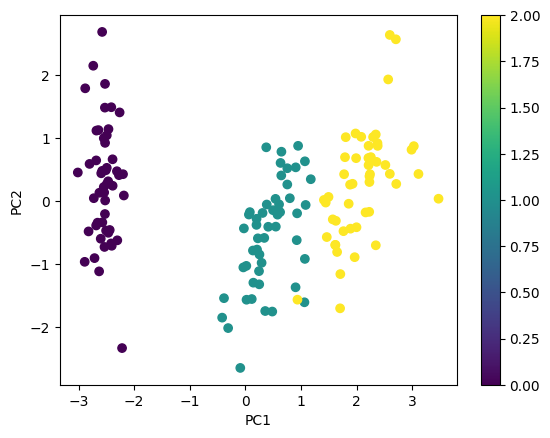

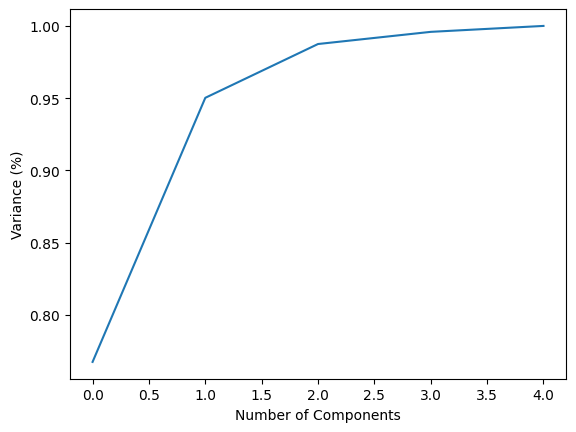

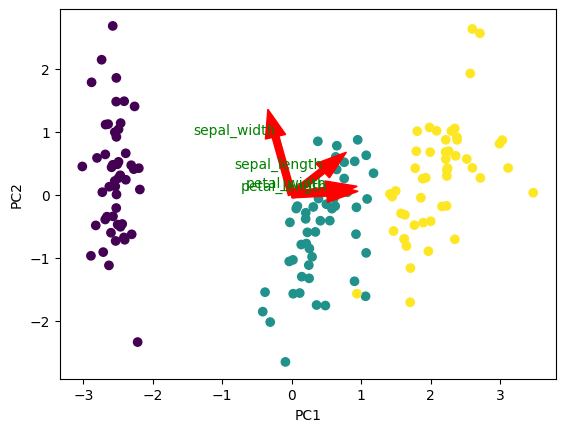

In [25]:
# PCA on iris dataset

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'iris.csv' with the actual dataset file)

iris = sns.load_dataset('iris')

iris['species'] = iris['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

features = iris.drop('species', axis=1)
target = iris['species']

features1 = StandardScaler().fit_transform(iris)

pca = PCA(n_components=2).fit_transform(features1)

selected_features6 = features.columns[np.argmax(pca.var(axis=0))]



# plotting pca
plt.scatter(pca[:, 0], pca[:, 1], c=target, cmap='viridis')
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# plotting varaince ratio

pca = PCA().fit(features1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.show()

# plotting pca with arrows

pca = PCA(n_components=2).fit(features1)
components = pca.transform(features1)
plt.scatter(components[:, 0], components[:, 1], c=target, cmap='viridis')
for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    if i < len(features.columns):  # Check if index is within valid range
        plt.arrow(0, 0, pc1, pc2, color='r', width=0.10)
        plt.text(pc1, pc2, features.columns[i], color='g', ha='right', va='bottom')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


